<a href="https://colab.research.google.com/github/amitya369/apnacollage-demo-/blob/main/stock3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow import keras

In [ ]:
start = '2012-01-01'
end = '2024-02-02'
stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3035,2024-01-26,152.869995,154.110001,152.800003,153.789993,153.789993,19494500
3036,2024-01-29,153.639999,155.199997,152.919998,154.839996,154.839996,20909300
3037,2024-01-30,154.009995,155.039993,152.774994,153.050003,153.050003,26578900
3038,2024-01-31,145.389999,145.589996,141.550003,141.800003,141.800003,43908600


In [ ]:
ma_100_days = data.Close.rolling(100).mean()


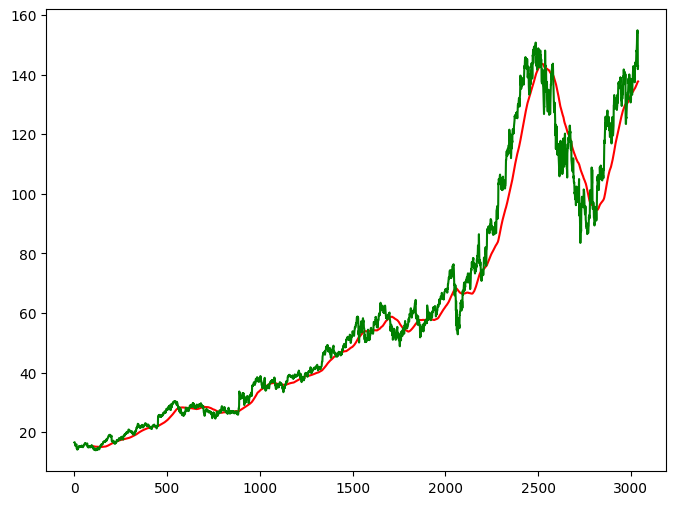

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days ,'r')
plt.plot(data.Close ,'g')
plt.show()

In [ ]:
ma_200_days= data.Close.rolling(200).mean()

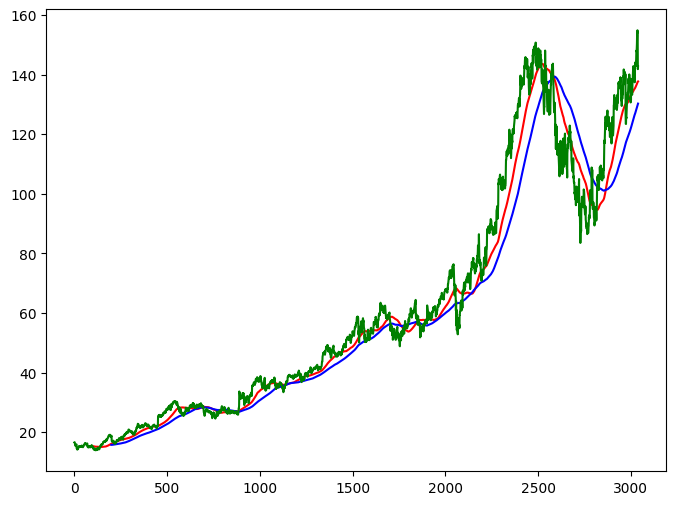

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days ,'r')
plt.plot(ma_200_days ,'b')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
data.dropna(inplace = True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[0: int(len(data)*0.20)])

In [ ]:
data_train.shape[0]

2432

In [ ]:
data_test.shape[0]

608

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [ ]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'builtin_function_or_method'>


In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x = x.reshape((-1, 28, 28, 1))

AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50 , activation= 'relu' ,return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units =60 ,activation = 'relu' ,return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units =80 ,activation = 'relu' ,return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units =120 ,activation = 'relu' ,return_sequences =True))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_9 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_10 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_11 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 100, 120)         

In [ ]:
model.compile(optimizer = 'adam' ,loss = 'mean_squared_error')

In [ ]:
model.fit(x,y ,epochs = 50,batch_size =32, verbose =1)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'numpy.float64'>"})